# IAB303 - 2021 - Assessment 1 - Part A

Answer the questions below to demonstrate your understand of foundational techniques.

You can run the *test* cells (after each answer cell) to check for simple errors.


In [21]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = 'Quoc Huy'
last_name = 'Nguyen'
student_number = 'n10289020'

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

## 1. Read a CSV file

After importing the required dataframes library as `pd`, read the contents of file `mountain_heights.csv` into a dataframe called `mountain_heights`. Use the mountain code for the index of the dataframe. Using a dataframe property, output the dataframe's rows and columns in the format `(rows,cols)`. 

**This solution requires 3 lines of code.**

In [1]:
### BEGIN SOLUTION
import pandas as pd
mountain_heights = pd.read_csv('./mountain_heights.csv', index_col=0)
mountain_heights.shape
### END SOLUTION

(10, 4)

In [2]:
### RUN BASIC TESTS
"Check that the dataframe has been loaded and rows and columns output"
assert(type(mountain_heights)==type(pd.DataFrame()))
assert(_==(10,4))

## 2. Fix missing data

Using a single line of code, assign the string `Antarctica` to the appropriate cell of the dataframe by using the index and column labels.

In [3]:
### BEGIN SOLUTION
mountain_heights.at['VNM', 'Country'] = 'Antarctica'
### END SOLUTION

In [4]:
### RUN BASIC TESTS
"Check that there are no NaN cells"
assert(mountain_heights['Country'].isnull().values.any()==False)

## 3. Finding significant data

Find the mountains that are higher than the average height of all mountains in the data. Start by getting the mean and assigning it to a variable called `mean_height`. Using the format `df[c]>x` as the conditional for the rows, create a new dataframe called `highest_mountains` which have heights greater than the mean. Without using `print()`, display the value of mean_height in the output of the cell.

**This solution requires 3 lines of code**


In [5]:
### BEGIN SOLUTION
import numpy as np
mean_height = np.mean(mountain_heights['Height'])
highest_mountains = mountain_heights[mountain_heights['Height'] > mean_height]
mean_height
### END SOLUTION

6060.9

In [6]:
### RUN BASIC TESTS
"Check highest_mountains shape, and output of cell"
assert(highest_mountains.shape==(3,4))
assert(_==6060.9)

## 4. Visualise

First, sort the `mountain_heights` dataframe by height in descending order and assign the result to a dataframe called `mountains_sorted`. Use a single line of code.

Then in a second single line of code, create a bar chart of the `mountains_sorted` dataframe. Assign the result of the plot to a variable called `mplot`, and include the following information:

* Title: Mountain Heights
* X Axis label: Mountain Code
* Y Axis label: Height (m)


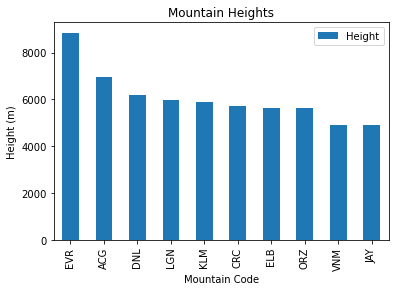

In [7]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
mountains_sorted = mountain_heights.sort_values(by='Height', ascending=False)
mplot = mountains_sorted.plot.bar(title='Mountain Heights', xlabel='Mountain Code', ylabel='Height (m)')
### END SOLUTION

In [8]:
### RUN BASIC TESTS
"Check mountains_sorted, and that a chart has been created"
assert(list(mountains_sorted.index) == ['EVR', 'ACG', 'DNL', 'LGN', 'KLM', 'CRC', 'ELB', 'ORZ', 'VNM', 'JAY'])
assert(type(mplot).__name__=='AxesSubplot')

## 5. Read a text file

Using the format `with open('myfile','r') as file:`, read the contents of file `system.log` into a single string and assign it to a variable called `syslog`. Display the contents of the variable in the output of the cell.

In [9]:
### BEGIN SOLUTION
with open('system.log', 'r') as file:
    syslog = file.read()
### END SOLUTION

In [10]:
### RUN BASIC TESTS
"Check reading using file"
import io
assert(type(file)==type(io.TextIOWrapper(io.BytesIO())))
"Check read as string"
assert(type(syslog)==type(""))

## 6. Structure text

Using the `syslog` string, create a list with each line being an element of the list. Ensure that lines do not include any newline characters. Assign the list to a variable called `sysloglist`. Iterate over this list and for each entry, create a list of date, time, code, and message. For example: `['2021-03-01','17:00:00','INFO','System startup complete']`. Add each created list to a new list called `syslogtable`. After iterating over `sysloglist`, the `syslogtable` should be a list of lists. Display this in the output of the cell.

In [11]:
### BEGIN SOLUTION
sysloglist = syslog.split('\n')
syslogtable = []
for line in sysloglist:
    element = line.split(" > ")
    message = element[1]
    meta = element[0].split(" ")
    meta.append(message)
    syslogtable.append(meta)
    
syslogtable
### END SOLUTION

[['2021-03-01', '17:00:00', 'INFO', 'System startup complete '],
 ['2021-03-01', '17:00:01', 'INFO', 'Status: normal'],
 ['2021-03-01', '23:52:12', 'WARN', 'High CPU load'],
 ['2021-03-01', '23:57:19', 'WARN', 'Limited available memory'],
 ['2021-03-02', '00:01:33', 'ERROR', 'Not enough memory to complete process'],
 ['2021-03-02', '00:01:34', 'ERROR', 'Status: resource failure'],
 ['2021-03-02', '00:01:35', 'WARN', 'System reboot due to resource failure'],
 ['2021-03-02', '00:03:48', 'INFO', 'System startup complete'],
 ['2021-03-02', '00:03:49', 'INFO', 'Status: normal (error reboot)']]

In [12]:
### RUN BASIC TESTS
"check list created without newlines"
assert(len(sysloglist)==9)
assert('\n' not in sysloglist)
"check table displayed"
table = _
assert(len(table)==9)
assert(len(table[8])==4)

## 7. Convert to JSON

Create a list called `headings` with the strings `date`, `time`, `code`, and `message` corresponding to the values in the `syslogtable`. Get the 7th entry of syslog table and turn it into a dictionary with the headings as keys. Assign it to a variable called `syslogentry`. Hint: use the zip function `dict(zip(keys,values))`. Convert the dictionary to a JSON string using the `json` library. Call the result `jsonentry` and display in the output of the cell.


In [13]:
### BEGIN SOLUTION
import json
headings = ['date', 'time', 'code', 'message']
syslogentry = dict(zip(headings, syslogtable[7]))
jsonentry = json.dumps(syslogentry) 
### END SOLUTION

In [14]:
### RUN BASIC TESTS
"Check headings, syslogentry and jsonentry"
assert(len(headings)==4)
assert(type(syslogentry)==type({}))
assert(type(jsonentry)==type(""))

## 8. Read a JSON file

Using the `url` below and the `requests` library, get data from the server and read it into a dictionary called `jupyterdata`. Display in the output of this cell a string with the format `version: value` where `value` is the value in the dictionary corresponding to the key `version`.

In [15]:
url = "https://jupyter-oncampus.qutanalytics.io/hub/api"
### BEGIN SOLUTION
import requests
jupyterdata = requests.get(url).content
jupyterdata = json.loads(jupyterdata)
"version: " + jupyterdata['version']
### END SOLUTION

'version: 1.4.2'

In [16]:
### RUN BASIC TESTS
"Check jupyterdata"
assert(type(jupyterdata)==type({}))

## 9. Create a function

Create a function called `get_json()` that when passed a URL, returns a dictionary created from the resulting JSON retrieved from that URL. For the purposes of this task, the function should work the url from question 8. Run the function to output the version of this server.

In [17]:
### BEGIN SOLUTION
def get_json(url):
    data = requests.get(url)
    return data.json()
### END SOLUTION

In [18]:
### RUN BASIC TESTS
"Check function returns value from url"
assert(get_json(url)['version']=='1.4.2')

## 10. Save JSON to file

Create a modified version of your `get_json()` function to save the resulting JSON data to a file called `output.json`. Call the function `save_json()` (Note: It should accept the URL as before).

In [19]:
### BEGIN SOLUTION
def save_json(url):
    data = requests.get(url).json()
    with open('output.json', 'w') as f:
        json.dump(data, f)
### END SOLUTION

In [20]:
### RUN BASIC TESTS
"Check function, and that file is created after running"
assert(callable(save_json))
import os.path
save_json(url)
assert(os.path.isfile('output.json'))
with open('output.json','r') as checkfile:
    check = json.loads(checkfile.read())
assert(check=={'version': '1.4.2'})